<!--# STAT 207: Data Science Exploration-->
# <u> Case Study 6</u>: Random Variables - Building Blocks for Inference 





## Goals of this Case Study

* Probability rules that work for any type of event
* What is a **random variable**?
* What are some types of random variable and what are their properties?
* How do we calculate probabilities involving a random variable?
* How do we calculate summary measures for our full distribution (parameters) and estimates based on a sample (statistics)?

## New Tools and Packages in this Case Study

* `scipy.stats` package contains many helpful functions for well-defined distributions of random variables
* The set of functions that is included for well-defined distributions include the ability to calculate probabilities, report summary measures for the distribution, and randomly generate values.
* `while` loops

## <u>Discrete Random Variables</u>: Calculating Probabilities

<u>Fitting the Definition of a Random Variable</u>: We determined in class that the random variable **X = number of times you flip a coin until you get a head** "fits the definition" of being a **geometric random variable** with p=0.5. Thus we say that **X** is a geometric random variable (ie. $X\sim Geom(p=0.5)$).

<u>Distribution Python Objects</u>: Because **geometric random variables** are well-known and well-studied by the statistics community, the **scipy.stats** package in Python has a **geom** <u>object</u> which contains a series of related functions involving **geometric random variables**. 

### Probability Mass Functions

<u>.pmf() Functions</u>: For instance, the **.pmf()** function which is associated with many **distribution scipy objects** calculates the probability that the corresponding random variable is equal to a given value (ie. $P(X=value)$).

For instance, the code below calculates $P(X=1)=0.5$, wehere $X$ is a geometric random variable with parameter $p=0.5$ (ie. $X\sim Geom(p=0.5)$).


In [1]:
from scipy.stats import geom

In [2]:
type(geom)

scipy.stats._discrete_distns.geom_gen

In [3]:
geom.pmf(1,p=0.5)

0.5

$P(X=2)=0.25$

In [4]:
geom.pmf(2,p=0.5)

0.25

$P(X=3)=0.125$

In [5]:
geom.pmf(3,p=0.5)

0.125

These probability values match what we calculated by hand during lecture.

### Cumulative Distribution Functions

<u>.cdf() Functions</u>: For instance, the **.cdf()** function which is associated with many **distribution scipy objects** (like **geom**) calculates the probability that the corresponding random variable is less than or equal to a given value (ie. $P(X\leq value)$).

For instance, the code below calculates $P(X\leq 2)=0.75$, wehere $X$ is a geometric random variable with parameter $p=0.5$ (ie. $X\sim Geom(p=0.5)$).

In [6]:
geom.cdf(2,p=0.5)

0.75

Again, this probability value matches what we calculated by hand during lecture.

## Randomly Generating Values for a Random Variable

### Based on the underlying experiment

While we have previously said that the random variable $X$ defined above is a random variable that follows the geometric distribution, we may find that you aren't sure how to identify the distribution for other random variables that you encounter or that a random variable cannot easily be categorized according to *well-known* distributions.

In this section, we will pretend that we *don't know* that our random variable $X$ "fits the definition" of a geometric random variable, which is a *well-known* random variable.

<u>Experiment</u> Keep flipping a coin until you get a head. Observe the total number of flips before stopping (including the head).

<u>Simulation of Experiment</u>: Let's first design a simulation that will mimic this experiment ourselves ("from scratch"). We will simulate the act of flipping a coin until we get a head. After we flip a head, we will define **X** to be the total number of flips in the experiment.

<u>Randomly Generating a Value for a Random Variable</u>: Thus we can think of this **X** as a **randomly generated value for the random variable** **X=number of times you flip a coin until you get a head** from the slides.

#### Simulating Flipping a Coin
This is like sampling repeatedly from the following data frame until we get an "H".

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [8]:
coin = pd.DataFrame({'side': ['T', 'H']}, index=[0,1])
coin

,side
0,T
1,H


#### Using a "while loop" to keep "flipping" until we get a head.
Here is some code using a **"while"** loop to keep flipping our simulated coin until we get 'heads'. Rerun the cell to see how the the count 'X' varies randomly.

A **while** loop will continue iterating through the loop (repeating the process) until the provided condition is met.  This is similar to a **for** loop, except in this case there is no definitive number of repetitions that must be completed before the loop concludes.

The **.item()** function pulls the value from the generated 1 item Series, so we can check if it equals 'H' or not. 

In [9]:
#This will be your randomly generate value for the random variable X
X = 0

#Set flop to anything but 'H' so we can "enter" the while loop
flip='T'

#Keep executing the code in this loop WHILE the 'flip' variable is not equal to 'H'
while flip != 'H':
    
    #Draw a random sample (of size n=1) from the population of flip outcomes
    flip = coin.sample(1)['side'].item()
    print('Flip:',flip)
    
    #Update the random variable to be one more head
    X = X + 1
    print('Current Value of X:',X)
    print('-----------------')

print('Final Value of Randomly Generated Value for X:',X)

Flip: T
Current Value of X: 1
-----------------
Flip: T
Current Value of X: 2
-----------------
Flip: H
Current Value of X: 3
-----------------
Final Value of Randomly Generated Value for X: 3


### Based on the underlying random variable distribution

Before, we simulated an experiment in order to understand the behavior of our random variable $X$.  However, we have already identified that $X$ follows a geometric distribution.  If we *know* this information, then it seems only right that we should use it.

Here, we will demonstrate how to simulate the values of a random variable when we *know* the random variable "fits the definition" of a *well-known* random variable.

Because we know that X is a geometric random variable, we can also use the **.rvs()** function to randomly generate values for the random variable. In this case, the **.rvs()** also performs a simulation of conducting a series of "independent trials" until we get a "success" (where the probability of success in any given trial is always p).

<u>.rvs() Function</u>: The **.rvs()** function randomly generates a series of values for a corresponding random variable.

Remember that for our coin flip random variable **X**, this $p=0.5$ (where "success" is flipping a head).

#### One Randomly Generated Value for X

In [10]:
X=geom.rvs(p=0.5, size=1)
X

array([2])

#### Ten Randomly Generated Values for X

In [11]:
X=geom.rvs(p=0.5, size=10)
X

array([1, 1, 1, 1, 2, 1, 3, 1, 5, 3])

## <u> Continuous Random Variables</u>: Calculating Probabilities

Just like we did for random variables that follow the geometric distribution, we can import a Python object (**norm** from the **scipy.stats** package) which contains a suite of useful functions related to a **normal random variable**. Most of the functions that applied to the **geom** object also can be used for the **norm** object and can be used in the same way. For instance, we can instead use:
* **norm.rvs()** to generate random variable values for a normal random variable 
* **norm.cdf()** to calculate the $P(X\leq value)$ when X is a normal random variable.

When using functions that pertain to the **norm** object there are at least two parameters that we usually always need to specify:
* <u>loc</u>: the loc parameter refers to the mean of the normal random variable and determines the location/center of the distribution
* <u>scale</u>: the scale parameter refers to the standard deviation of the normal random variable and determines the scale/spread of the distribution.

These parameters dictate various aspects of the distribution.  Defining the parameters is crucial to providing a complete definition of any random variable.

**Note:** If you don't stipulate these parameter values while using **norm** object functions, Python will assume that the mean of the random variable is 0 and that the standard deviation of the random variable is 1.

In [12]:
from scipy.stats import norm

We can use the cdf to solve for the probability statement above, which is contained within the `norm` suite of tools in the `.cdf()` function.

The syntax for the cdf calculation is 

`norm.cdf(x , loc = mean, scale = standard deviation)` 

to calculate

$P(X\leq x)=P(X<x)$.

<u>Question a</u>:

For example, suppose that $X$ is a random variable with mean 68 and standard deviation 3.5.  What is the probability that a randomly selected observation is at most 70?

$P(X\leq 70) = 0.716$

In [13]:
mean = 68
sd=3.5
norm.cdf(70, loc=mean, scale=sd)

0.7161454169013237

<u>Question b</u>:

What is the probability that a randomly selected observation is greater than 70?

$P(X> 70) =1- P(X\leq 70) = 1-.716 = 0.284$

In [14]:
mean = 68
sd=3.5
1-norm.cdf(70, loc=mean, scale=sd)

0.2838545830986763

**<u>Important Note</u>**: the **`.cdf()`** always finds areas/probabilies to the LEFT of the observation supplied. To find areas to the right you need to use 1 - .cdf()!

<u>Question c</u>:

What is the probability that a randomly selected observation is between 60 and 70?

$P(66<X\leq 70) =P(X\leq 70) - P(X< 65) =.716 - 0.196 = 0.520$

In [15]:
mean = 68
sd=3.5
norm.cdf(70, loc=mean, scale=sd)-norm.cdf(65, loc=mean, scale=sd)

0.5204624477475477

## Calculating Percentiles

Calculating probabilities associated with random variables is very helpful.  However, sometimes we want to work "backwards" in our calculation.  That is, instead of finding the probability that a random variable is less than some value, we might want to know the value that corresponds to a probability that the random variable takes that value or less of some number.

<u> Normal Percentile Function</u>

If X is a normal random variable we can use the function

**norm.ppf(p , loc = mean, scale = standard deviation)**

to calculate the value of x in which

$P(X\leq x)=P(X<x) = p$.

**Ex:** The average height of a woman in the U.S. is about 64” with a standard deviation of 2.5”. Assume that the heights of women in the U.S. has a normal distribution. So if we let X = height of a randomly selected woman in the U.S., then we know that X is a normal random variable.

How tall does a woman in the U.S. have to be in order to be in the top 10% of women’s heights?

<u>Answer</u>:
This is equivalent to asking what is the value of x in which $P(X<x) = 0.90$?

In [16]:
norm.ppf(0.90, loc=64, scale=2.5)

67.2038789138615

Thus, a woman that is 67.2" will be taller than 90% of women in the U.S. and shorter than 10% of women in the U.S.

**<u>Important Note</u>**: the **`.ppf()`** always finds x-axis values that correspond to the LEFT-TAIL AREA SUPPLIED. To find the x-axis value that corresponds to a RIGHT-TAIL AREA, you should supply the LEFT-TAIL AREA = 1 - RIGHT TAIL AREA to the function.

## Standard Normal Distribution

One special case of a Normal distribution is the Standard Normal distribution.  This is the normal distribution that is provided in Python by default.

Because the **standard normal random variable** is just a special kind of **normal random variable**, specifically one in which the mean = 0 and the standard deviation = 1, we use the same **norm** object from **scipy.stats** and the corresponding functions to perform any tasks related to **standard normal random variables** as well.

In each of these **norm** functions, we can either:
* set **loc = 0** (ie. *explicitly* set the mean to 0) and **scale = 1** (ie. *explicitly* set the standard deviation to 1 OR
* NOT specify values for the **loc** and **scale** parameters. (The **default values** for the **norm** object are set to **0** and **1** automatically).

**Ex:** What is the probability that a standard normal random variable is between -1.96 and 1.96?

<u>Answer</u>:

$P(-1.96<Z<1.96) = P(Z<1.96) - P(Z<-1.96) = 0.975 - 0.025 = 0.95$

In [17]:
norm.cdf(1.96,loc=0,scale=1) - norm.cdf(-1.96,loc=0,scale=1)

0.950004209703559

In [18]:
norm.cdf(1.96) - norm.cdf(-1.96)

0.950004209703559

**Ex:** What is the value in the standard normal distribution that is greater than 20% of observations?

<u>Answer</u>:

The value of z in which 

$P(Z\geq z) = 0.20$

is $z=-0.8416$.

In [19]:
norm.ppf(0.20, loc=0, scale=1)

-0.8416212335729142

In [20]:
norm.ppf(0.20)

-0.8416212335729142

We can also use the relationship between the standard normal distribution and any normal distribution to solve problems.

These two distributions are connected by z-scores and the corresponding z-transformation, where the z-value on a standard normal distribution corresponds to a value $x$ on any normal distribution with mean $\mu$ and standard deviation $\sigma$ according to the following equation:

$$ z = \frac{x - \mu}{\sigma}$$

**Ex:** The average time it took for all seniors at a local high school to finish a race was 8 minutes. The finishing times followed a normal distribution.

You ran the race in 7 minutes and your time was in the top 20% (ie. your time was higher than 20% of the participants). What was the standard deviation of the finishing times?

<u>Answer</u>:

Let X = finishing time of a randomly selected senior from the high school.

Because **X is a normal random variable**, the **z-score of X $(Z=\frac{X-E[X]}{SD[X})$** is a **standard normal random variable**.

Two things we know about the z-score of *your* finishing time (x=7).

1. The z-score of your finishing time of 7 minutes =$\frac{7-\mu}{\sigma}=\frac{7-8}{\sigma}$.
2. The z-score of your finishing time of 7 minutes is greater than 20% of other z-scores from the standard normal distribution. Using the ppf function, we know that this value is $z=-0.8416.$

So we can set these two pieces of information equal to eachother to get:

The z-score of your finishing time of 7 minutes = $-0.8416=\frac{7-8}{\sigma}$ and solve for $\sigma$ to get $\sigma = 1.188$ minutes.

In [21]:
norm.ppf(0.20)

-0.8416212335729142

In [22]:
(7-8) / norm.ppf(0.20)

1.1881829498938903

## <u>Distribution Summary Measures</u>: Calculating Parameters

Suppose that we'd like to know more about the features of the random variable $X$.  We can use Python to report various summary measures for a distribution.  These would correspond to the parameters, or true values for the population of this random variable.

**Example: X=number of flips until getting a head**

Remember $X\sim Geom(p=0.5)$.

Using ScyPy functions, we compute the mean, the median, the standard deviation, and the proportion less than 2 flips for this population.

In [23]:
params = ['mean', 'median', 'std', 'prop']
pop = [geom.mean(p=0.5),
      geom.median(p=0.5),
      geom.std(p=0.5),
      geom.cdf(2, p=0.5)]
pd.DataFrame({'population': pop}, index=params)

,population
mean,2.000000
median,1.000000
std,1.414214
prop,0.750000


How does this compare with what we calculated by hand during lecture?

## <u>Calculating a Sample Statistic</u> with Multiple Random Variables

We were able to calculate true values (parameters) for various summary measures of a well-defined distribution.  We may also want to estimate these values (statistics) based on sample data.  This may be especially helpful if these values do not come from a well-defined distribution.

<u>Sample Statistics of the Coin Flip Experiment in Python<u/>:

Ex: Consider our coin toss experiment where we keep flipping a coin until we get a head.  Let X=number of flips until stopping.  We found that $X\sim geom(p=0.5)$.

Suppose we decided to repeat this coin flip experiment 20 times.  We can represent
$X_i$=number of flips in the ith experiment until stopping.

Generate a random value for each $X_i$. Use this sample to generate values for:
* $\bar{X} ̅=(X_1+X_2+⋯+X_{20})/20$: the mean number of flips until stopping from the 20 experiments
* $m$: the median number of flips until stopping from the 20 experiments
* $s$: the standard deviation number of flips until stopping from the 20 experiments
* $P_2$: the proportion of the 20 experiments in which the number of flips (until stopping) was at most 2.

Also use these values to visualize the distribution of the random samples.

1. First, we randomly generate values for $X_1,X_2,...,X_{20}$.

In [24]:
sample = geom.rvs(p=0.5, size=20)
sample

array([2, 4, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4, 3, 1, 2, 1])

In [25]:
# convert the numpy array into a pandas series
sample = pd.Series(sample)
sample

0     2
1     4
2     1
3     1
4     6
5     2
6     1
7     1
8     1
9     1
10    1
11    1
12    2
13    3
14    1
15    4
16    3
17    1
18    2
19    1
dtype: int64

2. Next, we use these randomly generated values to calculate values for the sample statistics described above.

In [26]:
params = ['mean', 'median', 'std', 'prop <= 2']
samp = [sample.mean(), 
        sample.median(), 
        sample.std(), 
        (sample<=2).mean()]
pd.DataFrame({'sample': samp}, index=params)

,sample
mean,1.950000
median,1.000000
std,1.394538
prop <= 2,0.750000


3. Finally, we use these randomly generated values to visualize the distribution of the randomly generated sample values.

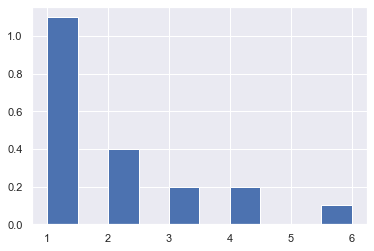

In [27]:
sample.hist(density=True)
plt.show()

How do the sample statistics compare to the population parameters calculated above?

---
STAT 207, Julie Deeke, Victoria Ellison, and Douglas Simpson, University of Illinois at Urbana-Champaign